# Phase Retrieval Testing and Examples

This notebook is for storing examples of how to use the `PhaseRetrieval` class in `PhaseRetrieval.py` for solving the phase problem on simple test cases.

In [8]:
# Setup notebook
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import phase_mixing_utils
import PhaseRetrieval
from skimage import color
from skimage.transform import rescale
from scipy.ndimage.filters import gaussian_filter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Toy data -- Gaussians

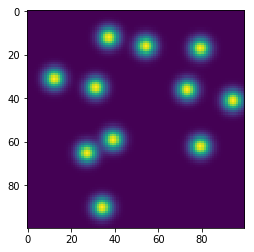

In [36]:
data = np.load("simple_gaussian_data/imgs0.npy")[np.random.randint(1000)]
mags = np.abs(np.fft.fftn(data))
plt.imshow(data)

## Error Reduction Algorithm

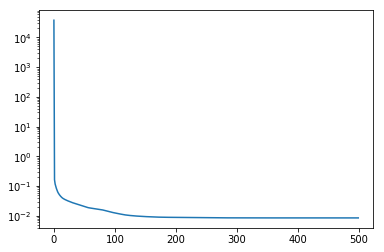

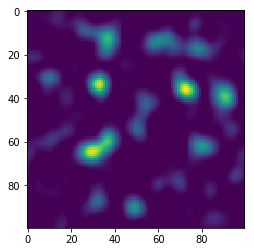

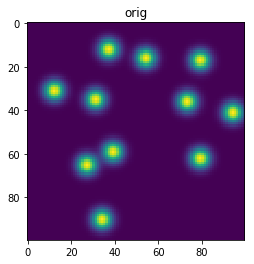

/Users/jgreisman/anaconda2/lib/python2.7/site-packages/skimage/feature/register_translation.py:105: RuntimeWarning: invalid value encountered in cdouble_scalars
  (src_amp * target_amp)


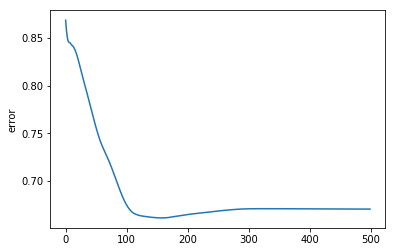

In [39]:
er = PhaseRetrieval.PhaseRetrieval(mags)
er.ErrorReduction(500)
plt.figure()
plt.semilogy(er.err_track)
plt.figure()
er.calc_real_space_error(data)

## Input-Output

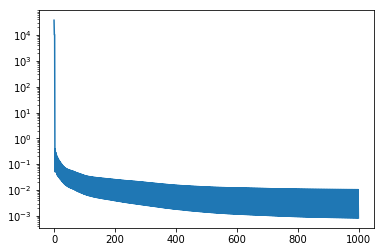

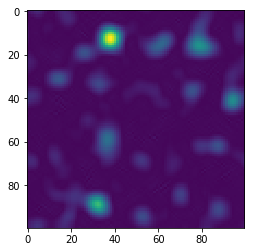

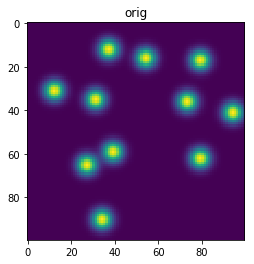

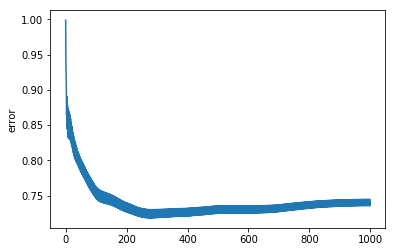

In [41]:
io = PhaseRetrieval.PhaseRetrieval(mags)
io.InputOutput(0.7, 1000)
plt.figure()
plt.semilogy(io.err_track)
plt.figure()
io.calc_real_space_error(data)

## Hybrid Input-Output

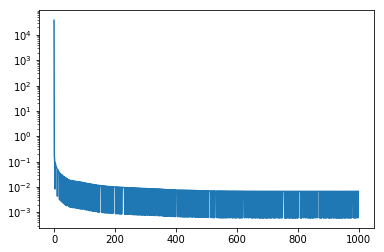

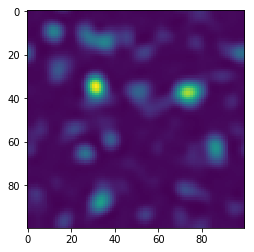

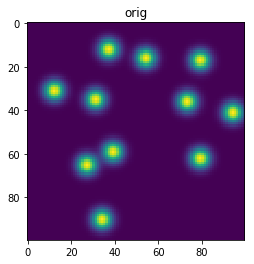

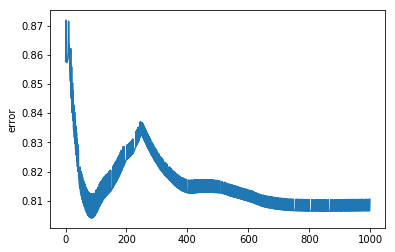

In [42]:
hio = PhaseRetrieval.PhaseRetrieval(mags)
hio.HIO(0.7, 0.5, 1000)
plt.figure()
plt.semilogy(hio.err_track)
plt.figure()
hio.calc_real_space_error(data)

## Continuous Hybrid Input-Output (CHIO)

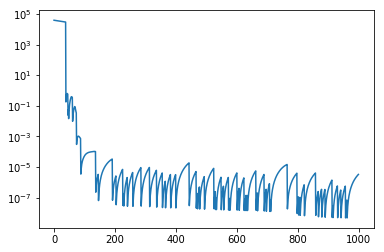

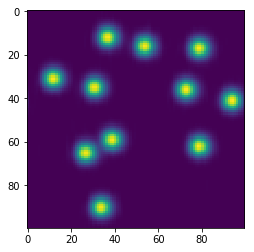

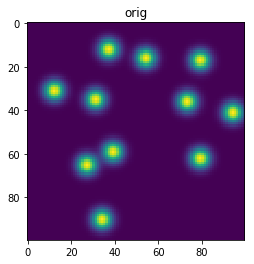

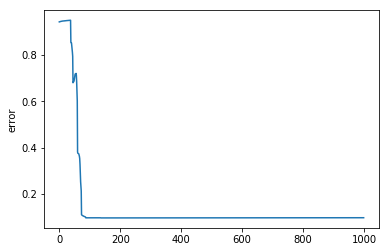

In [47]:
chio = PhaseRetrieval.PhaseRetrieval(mags)
chio.CHIO(n_iter=1000) # Use defaults
plt.figure()
plt.semilogy(chio.err_track)
plt.figure()
chio.calc_real_space_error(data)

## Bounded CHIO

This is the form of CHIO proposed by John to ensure properties are consistent with future denoising constraints.

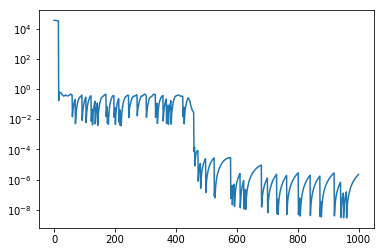

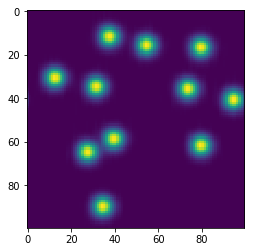

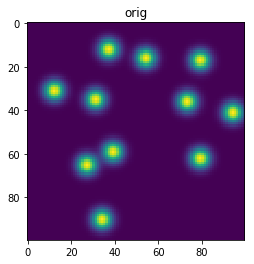

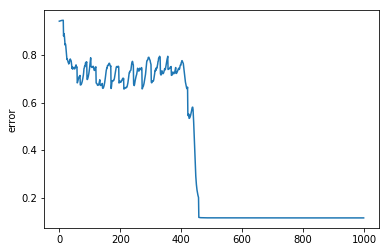

In [49]:
bchio = PhaseRetrieval.PhaseRetrieval(mags)
bchio.BoundedCHIO(n_iter=1000) # Use defaults
plt.figure()
plt.semilogy(bchio.err_track)
plt.figure()
bchio.calc_real_space_error(data)

## Example of custom density modification function

In [50]:
a = 0.4
b=0.7
freq=0.95
def customfunction(ndm,last,step_n):
    gamma = np.real(ndm)>a*last 
    delta = (0<np.real(ndm))*(~gamma)
    negatives = ~(gamma+delta)

    if np.random.rand() < freq:
        return (gamma*np.real(ndm) + delta*(np.real(last)-((1-a)/a)*np.real(ndm)) + (np.real(last) - b*np.real(ndm))*negatives)
    else:
        return (gamma*np.real(ndm))

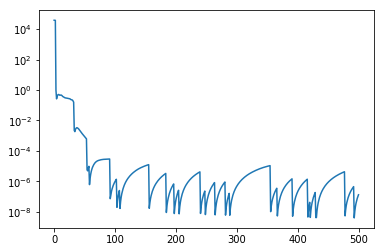

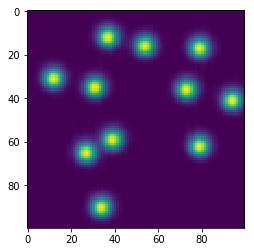

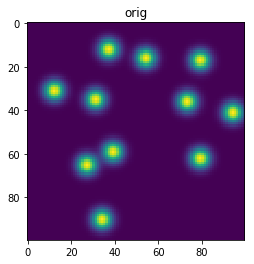

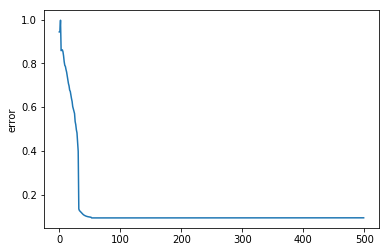

In [53]:
custom = PhaseRetrieval.PhaseRetrieval(mags)
custom.iterate(customfunction, 500)
plt.figure()
plt.semilogy(custom.err_track)
plt.figure()
custom.calc_real_space_error(data)

## Test CHIO on Duck

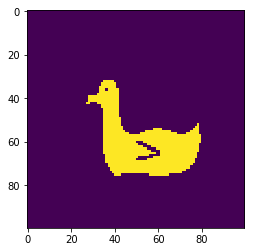

In [54]:
duck = plt.imread("duck.png")
duck = np.abs(color.rgb2gray(duck)[75:175, 75:175] - 1)
duck = (duck - duck.min()) / (duck.max() - duck.min())
plt.imshow(duck)

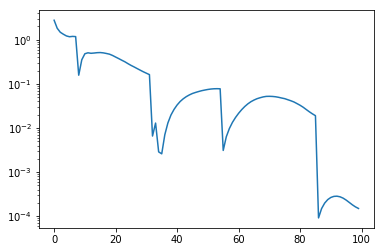

In [55]:
mags = np.abs(np.fft.fftn(duck))
chioduck = PhaseRetrieval.PhaseRetrieval(mags)
chioduck.CHIO(n_iter=100)
plt.semilogy(chioduck.err_track)

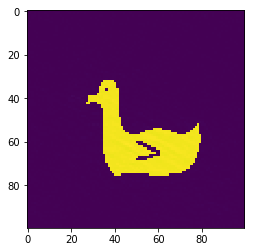

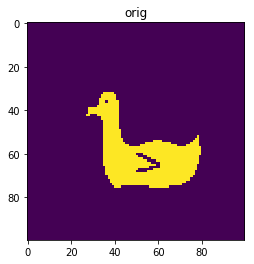

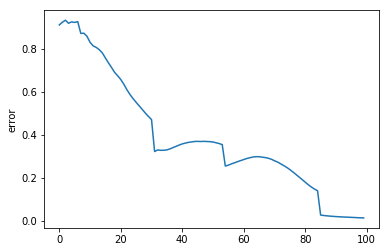

In [56]:
chioduck.calc_real_space_error(duck)

## Test CHIO on Cat

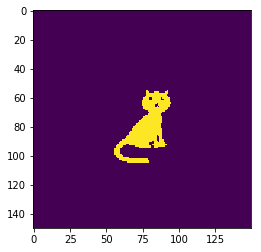

In [57]:
cat = plt.imread("cat1.png")
cat = np.abs(color.rgb2gray(cat)[50:200, 50:200] - 1)
cat = (cat - cat.min()) / (cat.max() - cat.min())
plt.imshow(cat)

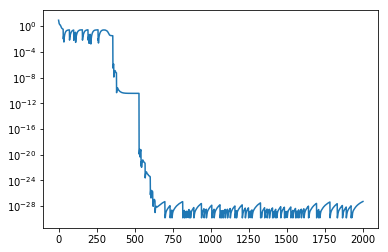

In [58]:
mags = np.abs(np.fft.fftn(cat))
chiocat = PhaseRetrieval.PhaseRetrieval(mags)
chiocat.CHIO(freq=0.95, n_iter=2000)
plt.semilogy(chiocat.err_track)

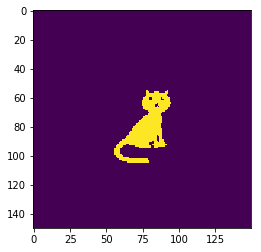

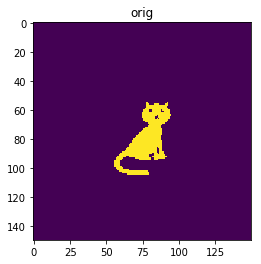

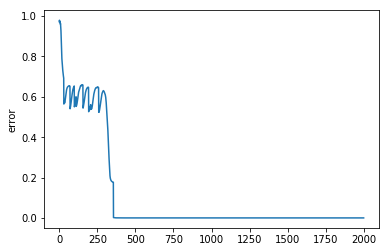

In [59]:
chiocat.calc_real_space_error(cat)

## Now for the Smiley

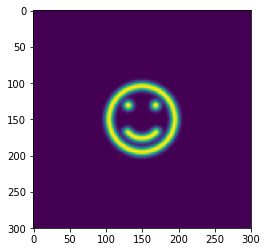

In [61]:
smiley = plt.imread("smiley.png")
smiley = np.abs(color.rgb2gray(smiley) - 1)
smiley = (smiley - smiley.min()) / (smiley.max() - smiley.min())
smiley = rescale(smiley, 1.0 / 9.8, mode="constant")
smiley = np.pad(smiley, 100, 'constant')
smiley = gaussian_filter(smiley, 3)
plt.imshow(smiley)

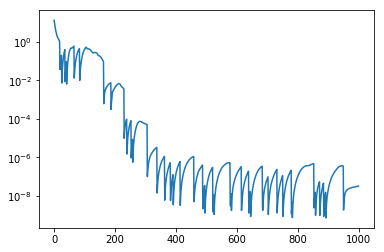

In [62]:
mags = np.abs(np.fft.fftn(smiley))
chiosmiley = PhaseRetrieval.PhaseRetrieval(mags)
chiosmiley.CHIO(n_iter=1000)
plt.semilogy(chiosmiley.err_track)

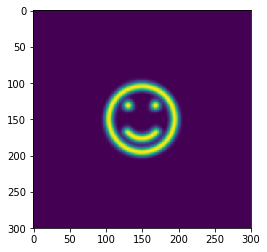

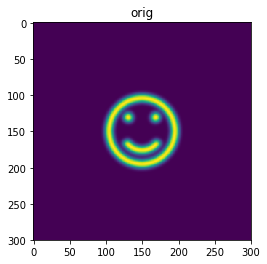

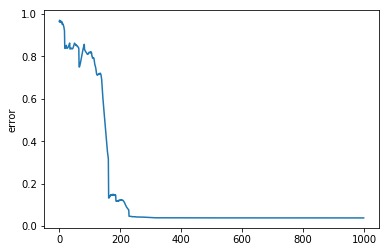

In [63]:
chiosmiley.calc_real_space_error(smiley)